In [1]:
# Load the top modules that are used in multiple places
import numpy as np
import pandas as pd

In [2]:
# Some global variables to drive the script
# data_url is the location of the data
# Data is not loaded from a local file
# Data is loaded from a prepocessed dataset
data_url="https://raw.githubusercontent.com/r-dube/CICIDS/main/MachineLearningCVE/processed/twoclass-cicids2017.csv"

In [3]:
# label names (YY) in the data and their
# mapping to numerical values
label_map = {
 'BENIGN' : 0,
 'FTP-Patator' : 1,
 'SSH-Patator' : 2,
 'DoS slowloris' : 3,
 'DoS Slowhttptest': 4,
 'DoS Hulk' : 5,
 'DoS GoldenEye' : 6,
 'Heartbleed' : 7,
 'Web Attack � Brute Force' : 8,
 'Web Attack � XSS' : 8,
 'Web Attack � Sql Injection' : 8,
 'Infiltration' : 9,
 'Bot' : 10,
 'PortScan' : 11,
 'DDoS' : 12,
}

num_ids_features = 76
num_ids_classes = 13
ids_classes = [ 'BENIGN', 'FTP-Patator', 'SSH-Patator', 'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye', 'Heartbleed', 'Brute Force', 'XSS', 'Sql Injection', 'Infiltration', 'Bot', 'PortScan', 'DDoS',]

In [4]:
# Utility functions used by GMM

def ids_load_df_from_csv():
    """
    Load dataframe from csv file
    Input:
        None
    Returns:
        None
    """

    df = pd.read_csv(data_url)

    # uncomment print statements for debugging if data does not load
    # print ("load Dataframe shape", df.shape)

    return df

def ids_pca_array(df):
    """
    Return numpy arrays from dataframe
    Input:
        Dataframe that has columns of covariates followed by a column of labels
    Returns:
        X, y as numpy arrays
    """
    numcols = len(df.columns)
    print("df.shape", df.shape)

    X = df.iloc[:, 0:numcols-1]
    y = df.loc[:, 'YY']

    X = X.values
    y = y.values

    print ("X.shape", X.shape, "y.shape", y.shape)

    return X, y

In [5]:
# Use PCA to visualize data
from sklearn.decomposition import PCA

df = ids_load_df_from_csv ()
X, y = ids_pca_array(df)
pca = PCA(n_components=12)
X2 = pca.fit_transform(X)
print ("X2.shape", X2.shape, "y.shape", y.shape)


df.shape (16000, 77)
X.shape (16000, 76) y.shape (16000,)
X2.shape (16000, 12) y.shape (16000,)


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

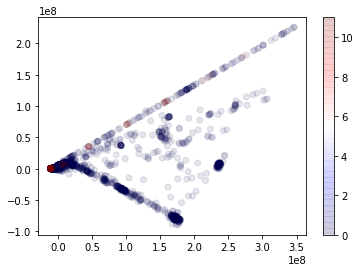

In [7]:
plt.scatter(X2[:, 0], X2[:, 1], c=y, alpha=0.1, cmap='seismic')
plt.colorbar();

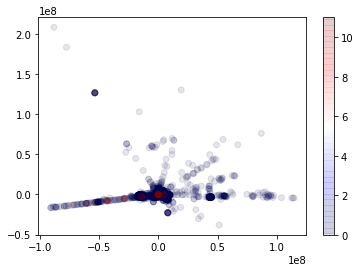

In [8]:
plt.scatter(X2[:, 2], X2[:, 3], c=y, alpha=0.1, cmap='seismic')
plt.colorbar();

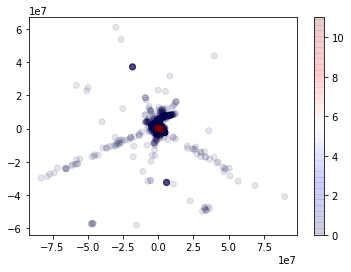

In [9]:
plt.scatter(X2[:, 4], X2[:, 5], c=y, alpha=0.1, cmap='seismic')
plt.colorbar();

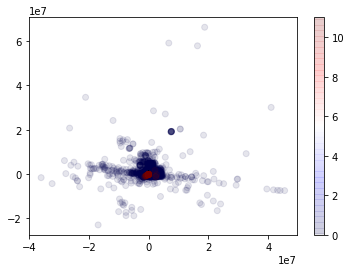

In [10]:
plt.scatter(X2[:, 6], X2[:, 7], c=y, alpha=0.1, cmap='seismic')
plt.colorbar();

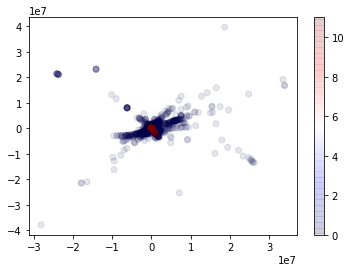

In [11]:
plt.scatter(X2[:, 8], X2[:, 9], c=y, alpha=0.1, cmap='seismic')
plt.colorbar();

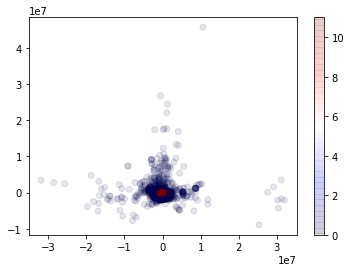

In [12]:
plt.scatter(X2[:, 10], X2[:, 11], c=y, alpha=0.1, cmap='seismic')
plt.colorbar();

In [13]:
# Helper function for logistic regression
def ids_split(df):
    """
    Input:
        Dataframe that has columns of covariates followed by a column of labels
    Returns:
        X_train, X_val, X_test, y_train, y_val, y_test as numpy arrays
    """

    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler

    numcols = len(df.columns)
    print("df.shape", df.shape)

    X = df.iloc[:, 0:numcols-1]
    y = df.loc[:, 'YY']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
    print ("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
    print ("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    y_train = y_train.values
    y_test = y_test.values

    return X_train, X_test, y_train, y_test

In [14]:
# Helper function for logistic regression
def ids_accuracy (y_actual, y_pred):
    """
    Input:
        Numpy arrays with actual and predicted labels
    Returns:
        two class accuracy and f1 scores
    """

    from sklearn.metrics import accuracy_score
    from sklearn.metrics import f1_score

    acc = accuracy_score (y_actual, y_pred)
    f1 = f1_score(y_actual, y_pred, average='macro')

    
    return acc, f1

In [15]:
# Classification using Logistic regression
from sklearn.linear_model import LogisticRegression

def ids_logistic():
    """
    Classify processed data set stored as csv file using logistic regression
    Print: accuracy, confusion matrix, f1 score on the validation data set
    Input:
        None    
    Returns:
        None
    """

    df = ids_load_df_from_csv ()
    X_train, X_test, y_train, y_test = ids_split(df)

    # max_iter could be set to a large value (10000) to prevent 
    # LogisticRegression() from complaining that # it is not coverging
    logreg = LogisticRegression(max_iter=100)
    logreg.fit(X_train, y_train)

    y_pred = logreg.predict(X_test)
    
    acc, f1 = ids_accuracy(y_test, y_pred)
    print('Classifier accuracy : {:.4f}'.format(acc), 'F1 score: {:.4f}'.format(f1))

In [16]:
ids_logistic()

df.shape (16000, 77)
X_train.shape (13600, 76) y_train.shape (13600,)
X_test.shape (2400, 76) y_test.shape (2400,)
Classifier accuracy : 0.9929 F1 score: 0.9929


In [17]:
# Helper function for GMM
def ids_gmm_std(df):
    """
    Standardize rhe input dataframe
    Input:
        Dataframe that has columns of covariates followed by a column of labels
    Returns:
        X, y as numpy arrays
    """

    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler

    numcols = len(df.columns)
    print("df.shape", df.shape)

    X = df.iloc[:, 0:numcols-1]
    y = df.loc[:, 'YY']

    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    y = y.values

    print ("X.shape", X.shape, "y.shape", y.shape)

    return X, y

In [18]:
# Fit unlabeled data using GMM
from sklearn import mixture

df = ids_load_df_from_csv ()
X, y = ids_gmm_std(df)

maxrun = 3

for run in range (maxrun):
    seed = 42 + run
    clf = mixture.GaussianMixture(n_components=2, covariance_type='full', random_state=seed)
    clf.fit(X)
    y_pred = clf.predict(X)
    count = np.sort(np.bincount(y_pred))
    count = count[count != 0]
    print ("run", run, "class0", count[0], "class11", count[1])

df.shape (16000, 77)
X.shape (16000, 76) y.shape (16000,)
run 0 class0 2452 class11 13548
run 1 class0 2452 class11 13548
run 2 class0 2452 class11 13548
